# MLZ week 2 session

In [5]:
import pandas as pd
import numpy as np
import urllib.request
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [7]:
filename = "cars_data.csv"

if not os.path.exists(filename):
    urllib.request.urlretrieve(data_url, filename)

In [8]:
df = pd.read_csv(filename)

## Data prep section

In [9]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
df.dtypes == "object"

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [13]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [14]:
type(df.dtypes[df.dtypes == "object"])

pandas.core.series.Series

In [15]:
df.dtypes[df.dtypes == "object"].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [16]:
string_columns = df.dtypes[df.dtypes == "object"].index

In [17]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [18]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


## EDA section

In [19]:
len(df)

11914

In [20]:
for c in df.columns:
    print(c)
    print(f"total unique values: {len(df[c].unique())}")
    print("example uniques: ", df[c].unique()[:3])
    print()

make
total unique values: 48
example uniques:  ['bmw' 'audi' 'fiat']

model
total unique values: 914
example uniques:  ['1_series_m' '1_series' '100']

year
total unique values: 28
example uniques:  [2011 2012 2013]

engine_fuel_type
total unique values: 11
example uniques:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']

engine_hp
total unique values: 357
example uniques:  [335. 300. 230.]

engine_cylinders
total unique values: 10
example uniques:  [6. 4. 5.]

transmission_type
total unique values: 5
example uniques:  ['manual' 'automatic' 'automated_manual']

driven_wheels
total unique values: 4
example uniques:  ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']

number_of_doors
total unique values: 4
example uniques:  [2. 4. 3.]

market_category
total unique values: 72
example uniques:  ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']

vehicle_size
total unique values: 3
example uniques:  ['compa

<Axes: xlabel='msrp', ylabel='Count'>

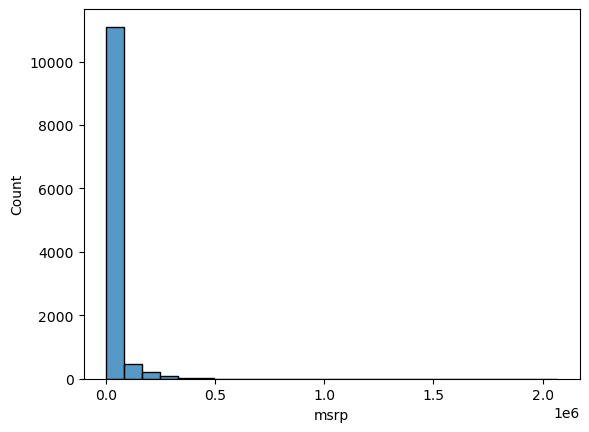

In [21]:
sns.histplot(df.msrp, bins=25)

<Axes: xlabel='msrp', ylabel='Count'>

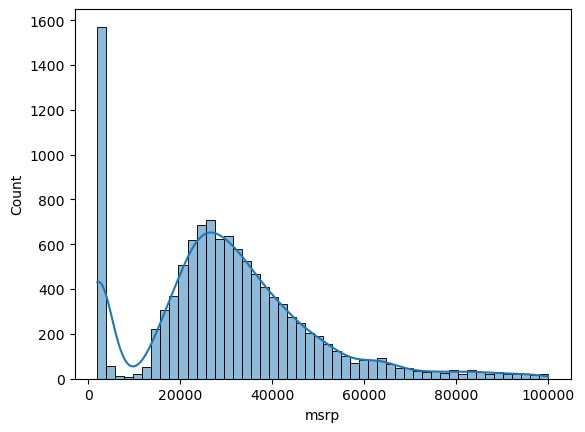

In [22]:
# drop long tails

sns.histplot(df.msrp[df.msrp < 100000], bins=50, kde=True)

<Axes: xlabel='msrp', ylabel='Count'>

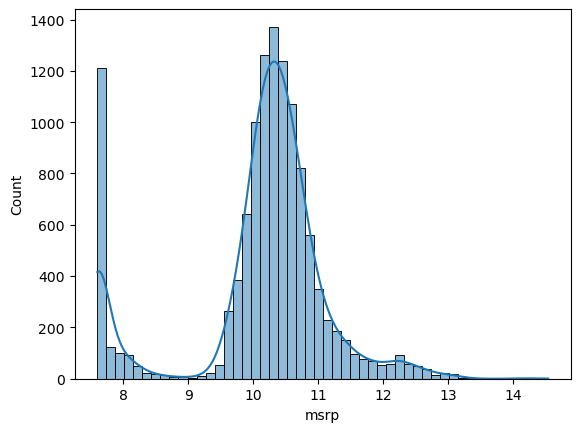

In [23]:
# long conversion to scale out tails

price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50, kde=True)

In [24]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation framework

In [26]:
m = len(df)
m_val = int(m * 0.2)
m_test = int(m * 0.2)
m_train = m - m_val - m_test
print(m, m_train, m_val, m_test)

11914 7150 2382 2382


In [27]:
df = df.sample(frac=1)

df_train = df.iloc[:m_train]
df_val = df.iloc[m_train:m_train+m_val]
df_test = df.iloc[m_train+m_val:]

assert (len(df_train) + len(df_val) + len(df_test)) == m

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2290,gmc,canyon,2015,regular_unleaded,305.0,6.0,automatic,rear_wheel_drive,4.0,NaN,compact,crew_cab_pickup,26,18,549,33420
2230,toyota,camry_solara,2007,regular_unleaded,210.0,6.0,automatic,front_wheel_drive,2.0,NaN,midsize,convertible,26,18,2031,30460
238,chrysler,300m,2004,premium_unleaded_(required),255.0,6.0,automatic,front_wheel_drive,4.0,performance,large,sedan,25,16,1013,32615
2687,mercedes-benz,cla-class,2015,premium_unleaded_(required),208.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617,31500
7199,volkswagen,new_beetle,2008,regular_unleaded,150.0,5.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,28,20,873,25740
5975,lexus,is_250,2015,premium_unleaded_(required),204.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,27,20,454,43690
3478,dodge,dakota,2010,regular_unleaded,210.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,18,14,1851,33180
7621,honda,pilot,2016,regular_unleaded,280.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,27,19,2202,37655
7437,buick,park_avenue,2003,premium_unleaded_(required),240.0,6.0,automatic,front_wheel_drive,4.0,performance,large,sedan,25,16,155,39725
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,35,26,819,24995


In [28]:
# alternative shuffle - deterministic

idx = np.arange(m)
np.random.seed(1)
np.random.shuffle(idx)

df_train = df.iloc[idx[:m_train]]
df_val = df.iloc[idx[m_train:m_train+m_val]]
df_test = df.iloc[idx[m_train+m_val:]]

assert (len(df_train) + len(df_val) + len(df_test)) == m

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
513,bmw,5_series_gran_turismo,2017,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,4.0,"hatchback,luxury,performance",large,4dr_hatchback,27,19,3916,60900
5164,infiniti,g37,2009,premium_unleaded_(required),328.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,190,33250
10331,toyota,tercel,1996,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,35,27,2031,2000
7723,mazda,protege5,2002,regular_unleaded,130.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,28,22,586,16455
10072,pontiac,sunbird,1994,regular_unleaded,110.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,32,22,210,2000
6386,nissan,leaf,2014,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,101,126,2009,32000
7286,lexus,nx_300h,2017,regular_unleaded,194.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,30,33,454,39720
2085,mercedes-benz,c-class,2017,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,34,24,617,41675
2728,mercedes-benz,cls-class,2016,premium_unleaded_(required),329.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,26,19,617,69400
5883,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,23095


In [29]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

df_train.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
513,bmw,5_series_gran_turismo,2017,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,4.0,"hatchback,luxury,performance",large,4dr_hatchback,27,19,3916
5164,infiniti,g37,2009,premium_unleaded_(required),328.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,190
10331,toyota,tercel,1996,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,35,27,2031
7723,mazda,protege5,2002,regular_unleaded,130.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,28,22,586
10072,pontiac,sunbird,1994,regular_unleaded,110.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,32,22,210
6386,nissan,leaf,2014,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,101,126,2009
7286,lexus,nx_300h,2017,regular_unleaded,194.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,30,33,454
2085,mercedes-benz,c-class,2017,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,34,24,617
2728,mercedes-benz,cls-class,2016,premium_unleaded_(required),329.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,26,19,617
5883,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640


In [30]:
y_train[:10]

array([11.01700487, 10.41184012,  7.60140233,  9.70844543,  7.60140233,
       10.37352243, 10.58963529, 10.6376807 , 11.14765656, 10.04741472])

## Regression

In [31]:
example = df_train.iloc[15]
example_label = y_train[15]
example

make                        chevrolet
model                     s-10_blazer
year                             1993
engine_fuel_type     regular_unleaded
engine_hp                       165.0
engine_cylinders                  6.0
transmission_type              manual
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                  midsize
vehicle_style                 4dr_suv
highway_mpg                        22
city_mpg                           16
popularity                       1385
Name: 8722, dtype: object

In [32]:
xi = [
    example.engine_hp,
    example.city_mpg,
    example.popularity
]

xi

[np.float64(165.0), np.int64(16), np.int64(1385)]

In [33]:
def g(xi):
    n = len(xi)
    w0 = 10
    w = [0.002 ,0.002, 0.002]

    pred = w0
    for j in range(n):
        pred += xi[j] * w[j]
    return pred

In [34]:
y_hat_i = g(xi)

print(y_hat_i)
print(np.expm1(y_hat_i).round(2), np.expm1(example_label).round(2))


13.132
504840.6 2000.0


## Vectorized

In [35]:
X = df_train[["engine_hp", "city_mpg", "popularity"]].values[:5]
X = np.hstack([np.ones((X.shape[0], 1)), X])

y = y_train[:5]

W = np.array([10, 0.002, 0.002, 0.002])

y_hat = X.dot(W)
print(y_hat.round(2))
print(y.round(2))

[18.47 11.07 14.3  11.48 10.68]
[11.02 10.41  7.6   9.71  7.6 ]


## Normal equation

In [36]:
# XTXw = XTy
# IW = XTX-1XTy

X = df_train[["engine_hp", "city_mpg", "popularity"]].values[:5]
X = np.hstack([np.ones((X.shape[0], 1)), X])

y = y_train[:5]

def train_reg(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w

w = train_reg(X, y)

print(w)

y_hat = X.dot(w)
print(y_hat.round(2))
print(y.round(2))

[ 1.31588230e+01  4.75076221e-03 -2.39745007e-01  2.70151254e-04]
[11.09 10.45  7.68  8.66  8.46]
[11.02 10.41  7.6   9.71  7.6 ]


## Baseline model

In [37]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
513,bmw,5_series_gran_turismo,2017,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,4.0,"hatchback,luxury,performance",large,4dr_hatchback,27,19,3916
5164,infiniti,g37,2009,premium_unleaded_(required),328.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,190


In [38]:
df_train.dtypes # extract numerical columns first

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [39]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [40]:
base_features = [
    "engine_hp",
    "engine_cylinders",
    "highway_mpg",
    "city_mpg",
    "popularity"
]

df_train[base_features].head(2)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
513,300.0,6.0,27,19,3916
5164,328.0,6.0,26,18,190


In [41]:
X_train = df_train[base_features].values
X_train[:5]

array([[ 300.,    6.,   27.,   19., 3916.],
       [ 328.,    6.,   26.,   18.,  190.],
       [  93.,    4.,   35.,   27., 2031.],
       [ 130.,    4.,   28.,   22.,  586.],
       [ 110.,    4.,   32.,   22.,  210.]])

In [42]:
w = train_reg(X_train, y_train)
w # error - missing values

array([nan, nan, nan, nan, nan])

In [43]:
df_train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        2
engine_hp              46
engine_cylinders       13
transmission_type       0
driven_wheels           0
number_of_doors         2
market_category      2254
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [44]:

X_train = df_train[base_features].fillna(0, inplace=False).values
X_train[:5]

array([[ 300.,    6.,   27.,   19., 3916.],
       [ 328.,    6.,   26.,   18.,  190.],
       [  93.,    4.,   35.,   27., 2031.],
       [ 130.,    4.,   28.,   22.,  586.],
       [ 110.,    4.,   32.,   22.,  210.]])

In [45]:
w = train_reg(X_train, y_train)
w

array([ 6.59257937e-03,  5.66886983e-01,  2.92817475e-01, -1.37409885e-01,
        6.43572566e-05])

In [46]:
y_hat_train = X_train.dot(w)
print(y_hat_train)
print(y_train)
print(len(y_hat_train), len(y_train))
print(y_hat_train.max(), y_train.max())

[10.92640276 10.71579225  9.54991216 ... 10.72964082  9.05410738
  9.96127122]
[11.01700487 10.41184012  7.60140233 ... 10.15214289  7.60140233
  9.60784051]
7150 7150
18.722302213476848 14.349527179656565


<Axes: ylabel='Count'>

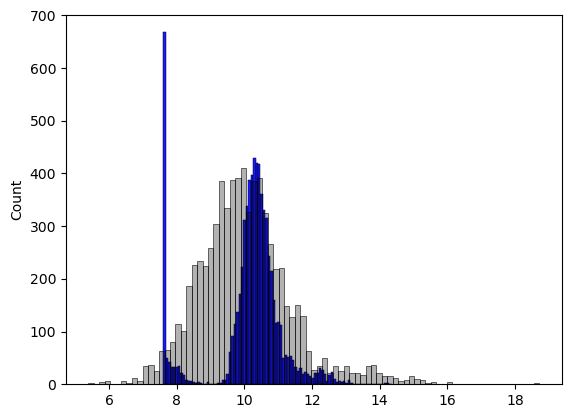

In [47]:
sns.histplot(y_train, color='blue', alpha=0.9)
sns.histplot(y_hat_train, color='black', alpha=0.3)

## RMSE

In [48]:
def rmse(y, y_hat):
    error = y - y_hat
    sq_error = error ** 2
    mse = sq_error.mean()
    return np.sqrt(mse)

In [50]:
err = rmse(y_train, y_hat_train)
err.item()

1.1504216711366009

## Validation

In [56]:
def prepare_X(df):
    df_num = df[base_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)
y_train = y_train

X_val = prepare_X(df_val)
y_val = y_val

w = train_reg(X_train, y_train)

y_pred_train = X_train.dot(w)
y_pred_val = X_val.dot(w)

train_err = rmse(y_train, y_pred_train)
val_err = rmse(y_val, y_pred_val)

print(train_err.round(2), val_err.round(2))

1.15 1.18
